# Multi plot color bar variations

This notebook shows examples of color bar variations, including:
- shared colorbar for many plots
- individual colorbars for each subplot
- different ticks and different color maps
- one figure to show two very different variables (heat and rain)
- demonstration with missing (None) figures.

In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


In [2]:
%%time
from acs_plotting_maps import *
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors, cm

regions = regions_dict['ncra_regions']

CPU times: user 15.7 s, sys: 1.08 s, total: 16.8 s
Wall time: 17.6 s


CPU times: user 44.2 s, sys: 1.15 s, total: 45.4 s
Wall time: 46.8 s


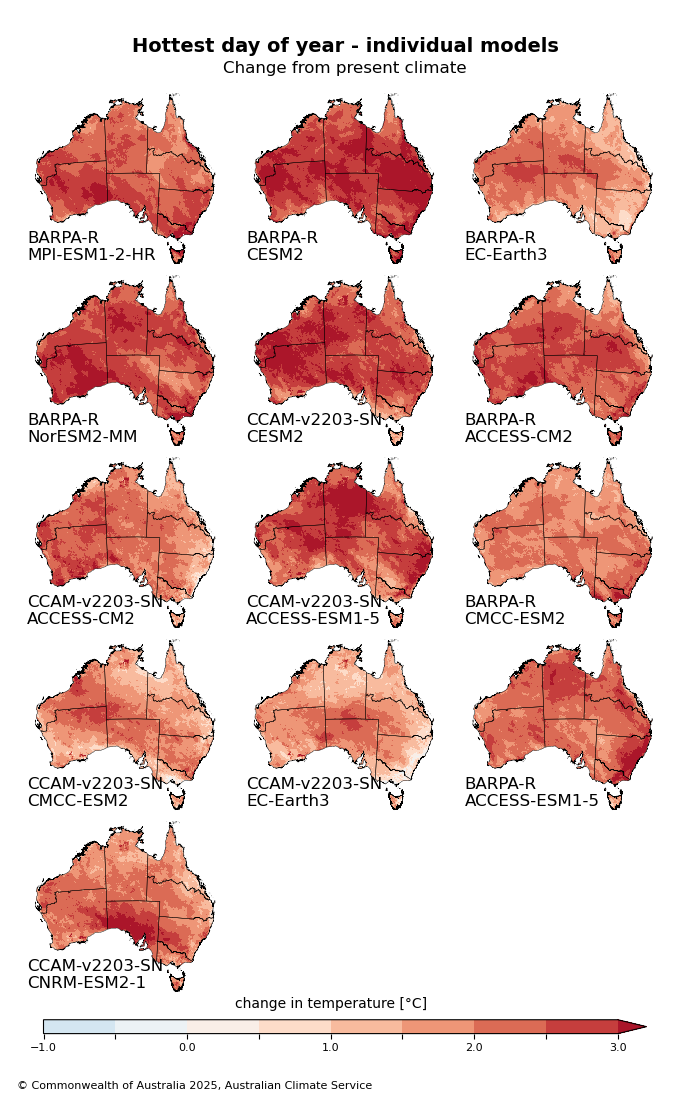

In [3]:
%%time 

# plot hazard for each model

var="TXx"
ds_list = [xr.open_dataset(file) for file in
           glob(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/individual_models/GWL-change/*GWL30-GWL12-change.nc")]

fig, ax = plot_acs_hazard_multi(ds_list=[ds[var] for ds in ds_list],
                    ncols=3, 
                    nrows=5,
                    figsize=(6.7,11),
                    regions = regions,
                    title = "Hottest day of year - individual models",
                    date_range = f"Change from present climate",
                    cmap = cmap_dict["tas_anom"],
                    ticks = np.arange(-1, 3.1, 0.5),
                    tick_interval=2,
                    cbar_label = "change in temperature [\N{DEGREE SIGN}C]",
                    subplot_titles=[f"{ds.downscaling_model}\n{ds.driving_model}" for ds in ds_list],
                    watermark="",
                    cbar_extend="max",
                    cbar_location="bottom",
                    issued_date="",
                    tick_rotation=0,
                    vcentre=0,
                    share_cbar=True,
                    )


In [4]:
ticks =[np.array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 np.array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 np.array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 np.array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 np.array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  ]),
 np.array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
np.array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 np.array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 np.array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 np.array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  ]),
 np.array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 np.array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 np.array([  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ])]


cmaps = [cmap_dict["tas_anom"], 
         cmap_dict["tas_anom"],
         cmap_dict["tas_anom"], 
         cmap_dict["tas_anom"],
         cmap_dict["tas_anom_1"],
         cmap_dict["tas_anom_1"], 
         cmap_dict["tas_anom_1"],
         cmap_dict["acs_temperature_div2"],
         cmap_dict["acs_temperature_div2"], 
         cmap_dict["acs_temperature_div2"],
         cmap_dict["acs_temperature_div1"],
         cmap_dict["acs_temperature_div1"], 
         cmap_dict["acs_temperature_div1"],]

cbar_labels = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m"]

CPU times: user 26.3 s, sys: 197 ms, total: 26.5 s
Wall time: 26.5 s


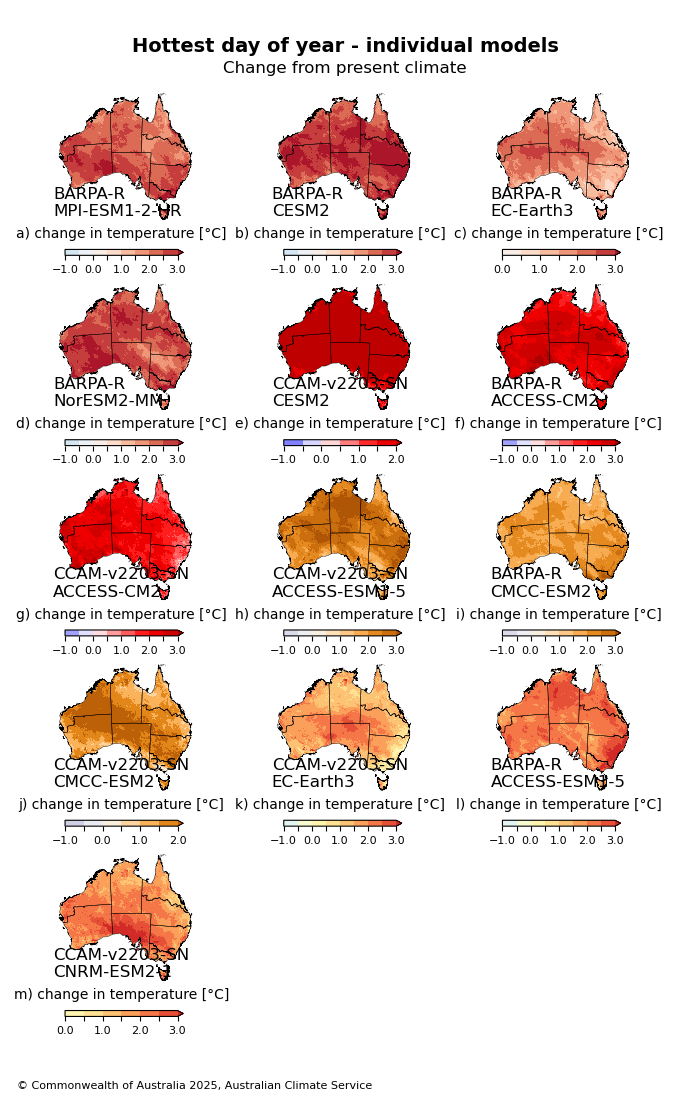

In [5]:
%%time 

# plot hazard for each model

var="TXx"
ds_list = [xr.open_dataset(file) for file in
           glob(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/individual_models/GWL-change/*GWL30-GWL12-change.nc")]

fig, ax = plot_acs_hazard_multi(ds_list=[ds[var] for ds in ds_list],
                    ncols=3, 
                    nrows=5,
                    figsize=(6.7,11),
                    regions = regions,
                    title = "Hottest day of year - individual models",
                    date_range = f"Change from present climate",
                    cmap = cmaps,
                    ticks =ticks,
                    tick_interval=2,
                    cbar_label = [f"{x}) change in temperature [\N{DEGREE SIGN}C]" for x in cbar_labels],
                    subplot_titles=[f"{ds.downscaling_model}\n{ds.driving_model}" for ds in ds_list],
                    watermark="",
                    cbar_extend="max",
                    cbar_location="bottom",
                    issued_date="",
                    tick_rotation=0,
                    vcentre=0,
                    share_cbar=False,
                    )

CPU times: user 3.18 s, sys: 47.3 ms, total: 3.23 s
Wall time: 3.27 s


(<Figure size 670x450 with 5 Axes>,
 array([<GeoAxes: >, <GeoAxes: >], dtype=object))

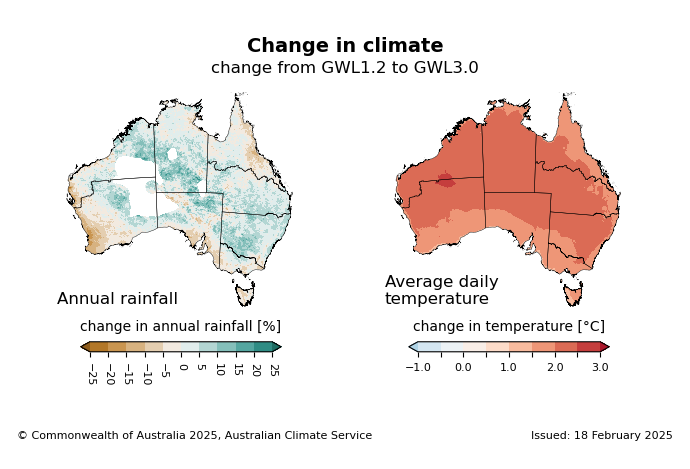

In [6]:
%%time
var = "prAdjust"

# ds_gwl12 = xr.open_dataset("/g/data/ia39/ncra/extratropical_storms/bias-corrected/monthly_precip/GWLs/pr_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12_annual.nc")
ds1 = xr.open_dataset(
    "/g/data/ia39/ncra/extratropical_storms/bias-corrected/monthly_precip/GWLs/pr_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30_change_annual.nc"
)[var]

cmap1 = cmap_dict['ipcc_prec_div']
ticks1 = np.arange(-25, 26, 5)
tick_interval1 = 1
tick_rotation1=-90
cbar_label1 = "change in annual rainfall [%]"
cbar_extend1="both"
agcd_mask1=True
subplot_titles1="Annual rainfall"
vcentre1=0



var = "TGm"
ds2 = xr.open_dataset(
    f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30-GWL12-change.nc"
)[var]


cmap2 =cmap_dict["tas_anom"]
ticks2 = np.arange(-1, 3.1, 0.5)
tick_interval2 = 2
tick_rotation2=0
cbar_label2 = "change in temperature [\N{DEGREE SIGN}C]"
cbar_extend2="both"
agcd_mask2=False
subplot_titles2="Average daily\ntemperature"
vcentre2=0




plot_acs_hazard_multi(ds_list=[ds1, ds2],
                      ncols=2,
                      nrows=1,
                      figsize=(6.7,4.5),
                      regions=regions,
                      title= "Change in climate",
                      date_range="change from GWL1.2 to GWL3.0",
                      cmap= [ cmap1, cmap2],
                      ticks=[ticks1, ticks2],
                      tick_interval=[tick_interval1 , tick_interval2],
                      tick_rotation=[tick_rotation1, tick_rotation2],
                      cbar_label=[cbar_label1, cbar_label2],
                      cbar_extend = [cbar_extend1, cbar_extend2],
                      agcd_mask=[agcd_mask1, agcd_mask2],
                      subplot_titles=[subplot_titles1, subplot_titles2],
                      vcentre=[vcentre1, vcentre2],
                     share_cbar=False,
                     watermark="")

                      
                      

CPU times: user 10.8 s, sys: 33.5 ms, total: 10.8 s
Wall time: 10.8 s


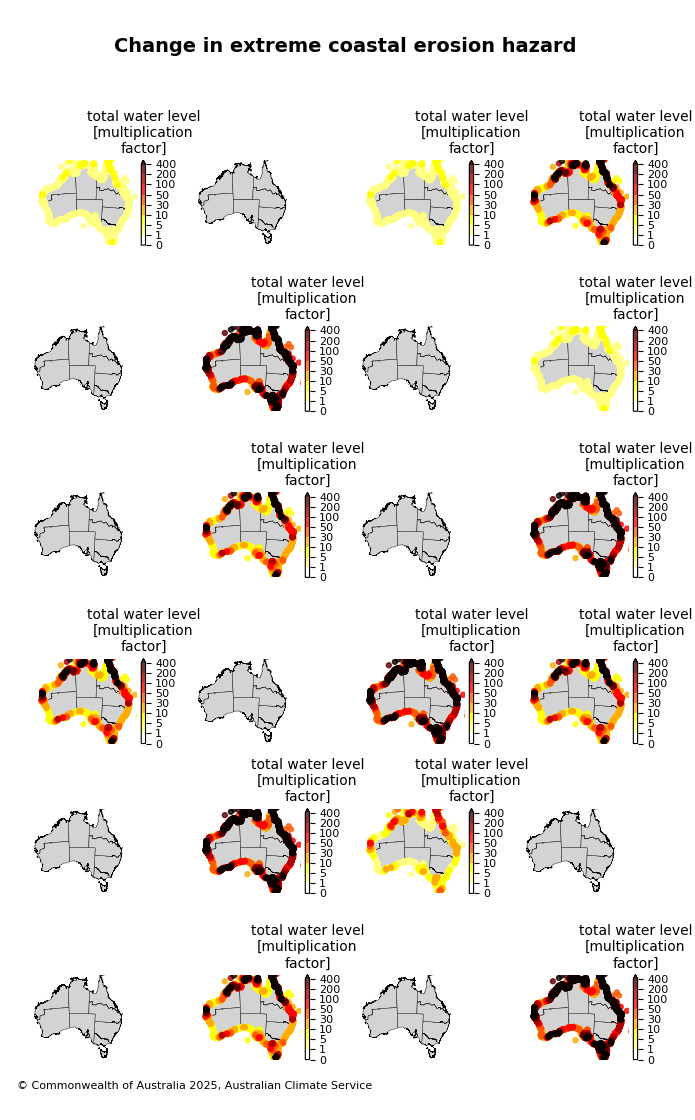

In [7]:
%%time 
# plot many station data including with missing data

#The MTWL MF is primarily a metric to evaluate the increase in coastal erosion for ocean coasts.

var = "MTWL_MFSLR_50"

df_slr020 = pd.read_csv("/g/data/ia39/ncra/coastal/MF/difference_files/MFSLR_ACSSH_MMALL_SLR14cm.csv")\
.rename(columns={"latitude":"lat", "longitude":"lon"})[["lat", "lon", var]].sort_values(var)
df_slr038 = pd.read_csv("/g/data/ia39/ncra/coastal/MF/difference_files/MFSLR_ACSSH_MMALL_SLR32cm.csv")\
.rename(columns={"latitude":"lat", "longitude":"lon"})[["lat", "lon", var]].sort_values(var)
df_slr060 = pd.read_csv("/g/data/ia39/ncra/coastal/MF/difference_files/MFSLR_ACSSH_MMALL_SLR54cm.csv")\
.rename(columns={"latitude":"lat", "longitude":"lon"})[["lat", "lon", var]].sort_values(var)
df_slr100 = pd.read_csv("/g/data/ia39/ncra/coastal/MF/difference_files/MFSLR_ACSSH_MMALL_SLR94cm.csv")\
.rename(columns={"latitude":"lat", "longitude":"lon"})[["lat", "lon", var]].sort_values(var)

plot_acs_hazard_multi(station_dfs=[df_slr020, None, df_slr020,  df_slr060, None, df_slr100, 
                                 None,df_slr020, None, df_slr060, None, df_slr100, 
                                 df_slr060, None, df_slr100,  df_slr060, None, df_slr100, 
                                 df_slr038, None,None, df_slr060, None, df_slr100, ],
                    ncols=4, 
                    nrows=6,
                    figsize=(6.7,11),
                    regions = regions,
                    cmap=cmap_dict["EHF_duration"],
                    ticks=np.array([0,1,5,10,30,50,100,200, 400]),
                    cbar_extend="max",
                    title = "Change in extreme coastal erosion hazard",
                    # date_range = " open ocean sandy beaches",
                    cbar_label = "total water level\n[multiplication\nfactor]",
                      cbar_location="right",
                    watermark=None,
                    facecolor="lightgrey",
                    issued_date="",
                    tick_rotation=0,
                      share_cbar=False,
);
